In [ ]:
! pip3 install face_recognition

     |████████████████████████████████| 100.2MB 75kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=047bda7a7d6175b5b982757a90a1f7dac1259b6e350f990d82f8a6bcc3adb00e
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


## Homework Assignment 9

**Question 1:** Select a short video with at least 3 persons and create a new movie from this video with a face tracker (each person’s face needs to be tracked by a rectangle of a different color) (50pt). See, for example, the video in: https://github.com/ageitgey/face_recognition

**Bonus:** Select a video with at least two animals (dog/cat/lion/tiger...), and create a video with an animal tracker (10pt).

In [ ]:
import face_recognition
import cv2

# This is a demo of running face recognition on a video file and saving the results to a new video file.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open the input movie file
input_movie = cv2.VideoCapture("./GOT/GOT.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

# Create an output movie file (make sure resolution/frame rate matches input video!)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('./GOT/output.avi', fourcc, 29.97, (640, 360))

# Load some sample pictures and learn how to recognize them.
ramsy_image = face_recognition.load_image_file("./GOT/ramsy.png")
ramsy_face_encoding = face_recognition.face_encodings(ramsy_image)[0]

jon_image = face_recognition.load_image_file("./GOT/jon.jpg")
jon_face_encoding = face_recognition.face_encodings(jon_image)[0]

sansa_image = face_recognition.load_image_file("./GOT/sansa.png")
sansa_face_encoding = face_recognition.face_encodings(sansa_image)[0]

known_faces = [
    ramsy_face_encoding,
    jon_face_encoding,
    sansa_face_encoding
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0
frames = []
while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

        # If you had more than 2 faces, you could make this logic a lot prettier
        # but I kept it simple for the demo
        name = None
        if match[0]:
            name = "Ramsy"
        elif match[1]:
            name = "Jon Snow"
        elif match[2]:
            name = "Sansa"

        face_names.append(name)

    # Label the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    img = arrayShow(frame)
    # display(img)
    # Write the resulting image to the output video file
    # print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)
    frames.append(frame)


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_movie = cv2.VideoWriter("./GOT/output.mp4", fourcc, 20, (width, height))

for frame in frames:
    output_movie.write(frame)

output_movie.release()
cv2.destroyAllWindows()
# All done!
input_movie.release()
cv2.destroyAllWindows()

Writing frame 1 / 360
Writing frame 2 / 360
Writing frame 3 / 360
Writing frame 4 / 360
Writing frame 5 / 360
Writing frame 6 / 360
Writing frame 7 / 360
Writing frame 8 / 360
Writing frame 9 / 360
Writing frame 10 / 360
Writing frame 11 / 360
Writing frame 12 / 360
Writing frame 13 / 360
Writing frame 14 / 360
Writing frame 15 / 360
Writing frame 16 / 360
Writing frame 17 / 360
Writing frame 18 / 360
Writing frame 19 / 360
Writing frame 20 / 360
Writing frame 21 / 360
Writing frame 22 / 360
Writing frame 23 / 360
Writing frame 24 / 360
Writing frame 25 / 360
Writing frame 26 / 360
Writing frame 27 / 360
Writing frame 28 / 360
Writing frame 29 / 360
Writing frame 30 / 360
Writing frame 31 / 360
Writing frame 32 / 360
Writing frame 33 / 360
Writing frame 34 / 360
Writing frame 35 / 360
Writing frame 36 / 360
Writing frame 37 / 360
Writing frame 38 / 360
Writing frame 39 / 360
Writing frame 40 / 360
Writing frame 41 / 360
Writing frame 42 / 360
Writing frame 43 / 360
Writing frame 44 / 3

In [ ]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="./GOT/output.mp4" type="video/mp4">
    </video>
""")

**Question 2:** Create an image classifier that can identify if a person in the image wears a facial mask (45pt). Evaluate the classifier precision (5pt)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from warnings import filterwarnings
filterwarnings("ignore")


HEIGHT = 120
WEIGHT = 120

import os
from sklearn.metrics import precision_score
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
from keras.losses import binary_crossentropy

In [1]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [7]:
# ! kaggle datasets download -d niharika41298/withwithout-mask -p ./dataset/face/
!unzip ./dataset/face/withwithout-mask.zip  -d ./dataset/face/ 


Archive:  ./dataset/face/withwithout-mask.zip
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/0-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/1-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/10-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/11-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/12-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/13-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/14-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/15-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/16-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/17-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/18-with-mask.jpg  
  inflating: ./dataset/face/maskdata/maskdata/test/with_mask/19-with-mask.jp

In [5]:
train_data_generator = ImageDataGenerator(rescale=1./255,
                                         zoom_range=0.2,
                                         shear_range=0.2,
                                         rotation_range=0.2)

test_data_generator = ImageDataGenerator(rescale=1./255)
train_generator1 = train_data_generator.flow_from_directory(
        './dataset/face/maskdata/maskdata/train/',
        target_size=(HEIGHT,WEIGHT),
        batch_size=77,
        interpolation="nearest",
        class_mode='binary',
        classes=["without_mask","with_mask"])

test_generator1 = test_data_generator.flow_from_directory(
        './dataset/face/maskdata/maskdata/test/',
        target_size=(HEIGHT,WEIGHT),
        batch_size=66,
        interpolation="nearest",
        class_mode='binary',
        classes=["without_mask","with_mask"])


Flowing Train
Found 616 images belonging to 2 classes.
Flowing Test
Found 198 images belonging to 2 classes.


In [21]:
def genToTuple(gen):
    templist = []
    templist2 = []
    for i in range(gen.__len__()):
        tempnext = gen.next()
        templist.append(tempnext[0])
        templist2.append(tempnext[1])
    x=np.concatenate(templist)
    y=np.concatenate(templist2)
    return (x,y)

x_train, y_train = genToTuple(train_generator1)
x_test, y_test = genToTuple(test_generator1)
print("Checking shapes")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Checking shapes
(616, 120, 120, 3) (616,) (198, 120, 120, 3) (198,)


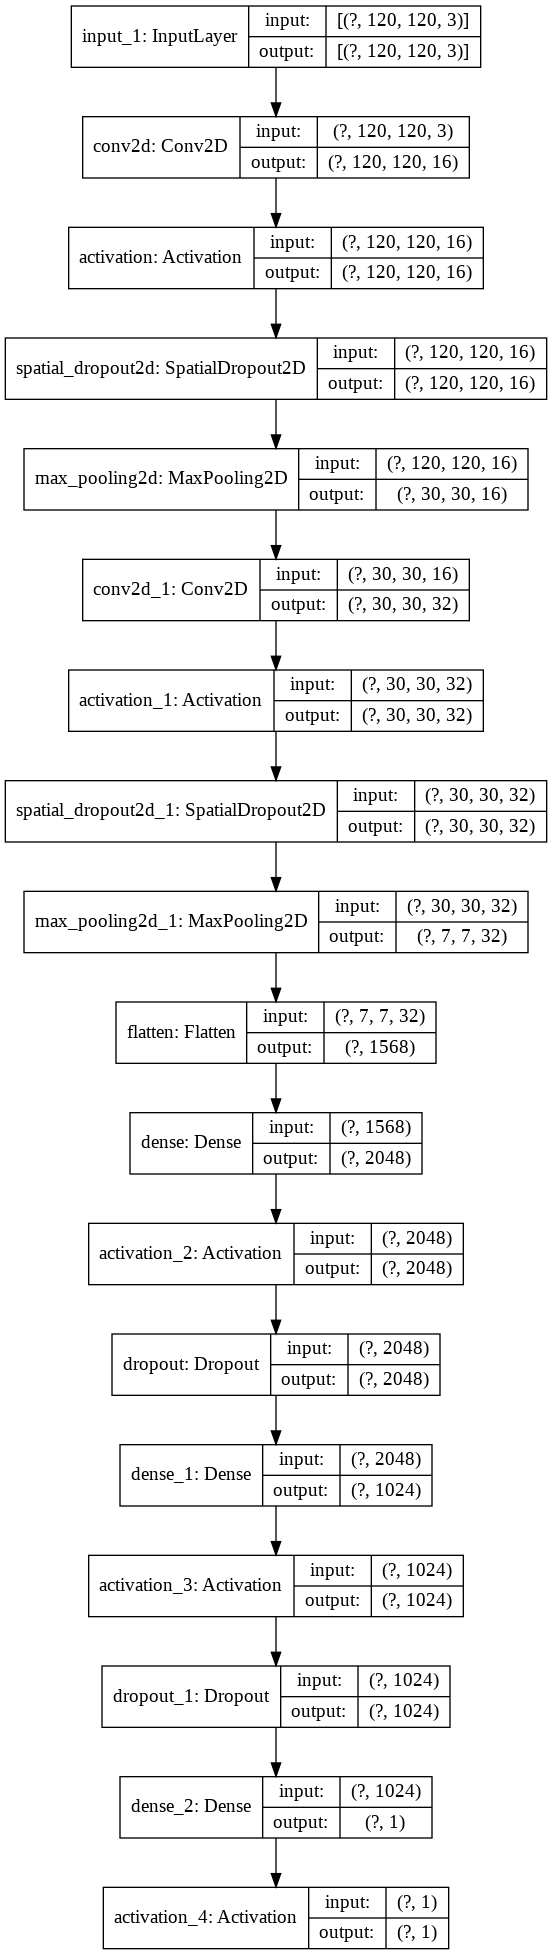

In [10]:
def build_model():
        # just a simole CNN, with maxpool layers network. it's a pretty easy task
        # No need for transfer learning
        model = Sequential()
        
        model.add(Input(shape=(HEIGHT,WEIGHT,3,)))

        model.add(Conv2D(filters=16,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(4,4)))

        model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(4,4),strides=(4,4)))
               
        model.add(Flatten())
        
        model.add(Dense(2048))
        model.add(Activation("relu"))
        model.add(Dropout(0.25))
        
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        
        
        model.add(Dense(1))
        model.add(Activation("sigmoid"))
        
        optimizer = Adam(lr=0.001)
        model.compile(optimizer = optimizer ,metrics=["accuracy"], loss = binary_crossentropy)
        
        return model

model = build_model()
plot_model(model,show_shapes=True,show_layer_names=True)

In [12]:
reducer = ReduceLROnPlateau(monitor='loss',patience=3,factor=0.75,min_lr=0.000001,verbose=1)
epochs = 100
batch_size = 32
steps_per_epoch = x_train.shape[0] // batch_size
history = model.fit(x_train,y_train,
                    epochs = epochs, 
                    verbose = 1,
                    batch_size=batch_size,
                    steps_per_epoch = steps_per_epoch,
                    callbacks=[reducer])

Epoch 1/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0087 - accuracy: 0.9967
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 0.9983
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 7/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/100
19/19 [==============================] - 0s 9ms/step - loss: 9.1148e-04 - accuracy: 1.0000
Epoch 9/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 0.9983
Epoc

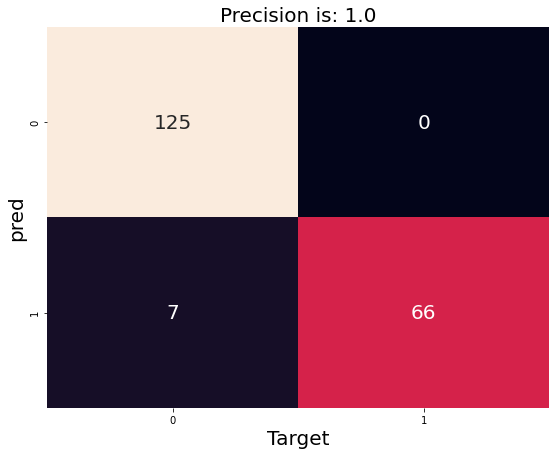

In [18]:

ypred = model.predict_classes(x_test)
plt.subplots(figsize=(9,7))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
plt.title(f'Precision is: {precision_score(ypred,y_test)}',fontsize=20)
plt.xlabel("Target",fontsize=20)
plt.ylabel("pred",fontsize=20)
plt.show()

In [20]:
print(f"Printed on the title, but same here: precision: Precision is: {precision_score(ypred,y_test)}")

Printed on the title, but same here: precision: Precision is: 1.0


## Additional Question for Practice

**Question:** Select a collection of connected images. Create a graph of the links among images or objects in images (42pt). Use graph algorithms to discover interesting insights regarding the images. See, for example, [Figure 2](https://arxiv.org/pdf/1509.00568.pdf) (8pt).